In [1]:
#!pip install seaborn

In [14]:
#%%capture

#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [21]:
#file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
#file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Mauricio Ospina - Instituto Distrital Turismo_Reto Observatorio de Turismo_Mauricio Ospina/9. Base de las rutas de transporte e Bogotá (2021)- Estación Troncal.xlsx'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_TM = '../Datasets/9. Base de las rutas de transporte e Bogotá (2021)- Estación Troncal.xlsx'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO':'Antonio Nariño', 
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                 'SUMAPAZ':'Sumapaz'
}

In [8]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

MapaLocalidades['Localidad']=MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

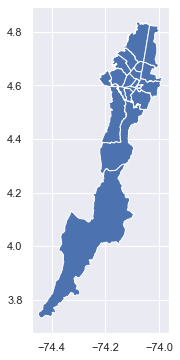

In [9]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base TM

In [22]:
df_TM = pd.read_excel(io=filepath_TM, engine='openpyxl',sheet_name='Hoja1')
df_TM

,Shape,objectid,numero_estación,nombre_estación,ubicación,troncal_estación,numero_vagones,numero_accesos,biciestación,capacidad,tipo estación,biciparqueadero,latitud,longitud,last_edi_1
0,Point,1,2205,Calle 106,Calle 106,Autonorte,4,1,0,0,4,0,4.692982,-74.056178,2021-09-27
1,Point,2,2000,Portal del Norte,Calle 173,Autonorte,0,0,0,0,1,0,4.754621,-74.046035,2021-09-27
2,Point,3,7108,AV. El Dorado,Kr 30 Av 28,NQS,1,1,0,0,4,0,4.630663,-74.079866,2021-09-27
3,Point,4,2204,Pepe Sierra,Calle 116,Autonorte,2,1,0,0,4,0,4.698125,-74.055298,2021-09-27
4,Point,5,2103,Mazurén,Calle 152,Autonorte,5,1,0,0,4,0,4.734585,-74.049218,2021-09-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Point,145,12000,Puente Aranda,calle 13 carrera 47,Americas,2,1,0,0,4,0,4.625669,-74.104640,2021-09-27
145,Point,146,10006,San Victorino,Kra 10- Cl12,Cr 7-10,3,2,0,0,4,0,4.601018,-74.077406,2021-09-27
146,Point,147,10003,Ciudad Jardín,Kra 10- Cl12 sur,Cr 7-10,2,1,0,0,4,0,4.581532,-74.090338,2021-09-27
147,Point,148,10004,Policarpa,Kra 10- Cl3 sur,Cr 7-10,2,2,0,0,4,0,4.586257,-74.086921,2021-09-27


In [23]:
df_TM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Shape             149 non-null    object        
 1   objectid          149 non-null    int64         
 2   numero_estación   149 non-null    int64         
 3   nombre_estación   149 non-null    object        
 4   ubicación         149 non-null    object        
 5   troncal_estación  149 non-null    object        
 6   numero_vagones    149 non-null    int64         
 7   numero_accesos    149 non-null    int64         
 8   biciestación      149 non-null    int64         
 9   capacidad         149 non-null    int64         
 10  tipo estación     149 non-null    int64         
 11  biciparqueadero   149 non-null    int64         
 12  latitud           149 non-null    float64       
 13  longitud          149 non-null    float64       
 14  last_edi_1        149 non-

In [24]:
gdf = gpd.GeoDataFrame(df_TM, geometry=gpd.points_from_xy(df_TM.longitud, df_TM.latitud))
gdf

,Shape,objectid,numero_estación,nombre_estación,ubicación,troncal_estación,numero_vagones,numero_accesos,biciestación,capacidad,tipo estación,biciparqueadero,latitud,longitud,last_edi_1,geometry
0,Point,1,2205,Calle 106,Calle 106,Autonorte,4,1,0,0,4,0,4.692982,-74.056178,2021-09-27,POINT (-74.05618 4.69298)
1,Point,2,2000,Portal del Norte,Calle 173,Autonorte,0,0,0,0,1,0,4.754621,-74.046035,2021-09-27,POINT (-74.04604 4.75462)
2,Point,3,7108,AV. El Dorado,Kr 30 Av 28,NQS,1,1,0,0,4,0,4.630663,-74.079866,2021-09-27,POINT (-74.07987 4.63066)
3,Point,4,2204,Pepe Sierra,Calle 116,Autonorte,2,1,0,0,4,0,4.698125,-74.055298,2021-09-27,POINT (-74.05530 4.69813)
4,Point,5,2103,Mazurén,Calle 152,Autonorte,5,1,0,0,4,0,4.734585,-74.049218,2021-09-27,POINT (-74.04922 4.73459)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Point,145,12000,Puente Aranda,calle 13 carrera 47,Americas,2,1,0,0,4,0,4.625669,-74.104640,2021-09-27,POINT (-74.10464 4.62567)
145,Point,146,10006,San Victorino,Kra 10- Cl12,Cr 7-10,3,2,0,0,4,0,4.601018,-74.077406,2021-09-27,POINT (-74.07741 4.60102)
146,Point,147,10003,Ciudad Jardín,Kra 10- Cl12 sur,Cr 7-10,2,1,0,0,4,0,4.581532,-74.090338,2021-09-27,POINT (-74.09034 4.58153)
147,Point,148,10004,Policarpa,Kra 10- Cl3 sur,Cr 7-10,2,2,0,0,4,0,4.586257,-74.086921,2021-09-27,POINT (-74.08692 4.58626)


In [25]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Shape             149 non-null    object        
 1   objectid          149 non-null    int64         
 2   numero_estación   149 non-null    int64         
 3   nombre_estación   149 non-null    object        
 4   ubicación         149 non-null    object        
 5   troncal_estación  149 non-null    object        
 6   numero_vagones    149 non-null    int64         
 7   numero_accesos    149 non-null    int64         
 8   biciestación      149 non-null    int64         
 9   capacidad         149 non-null    int64         
 10  tipo estación     149 non-null    int64         
 11  biciparqueadero   149 non-null    int64         
 12  latitud           149 non-null    float64       
 13  longitud          149 non-null    float64       
 14  last_edi_1        

In [26]:
baseTM = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left',predicate='within')
baseTM

,Shape,objectid,numero_estación,nombre_estación,ubicación,troncal_estación,numero_vagones,numero_accesos,biciestación,capacidad,tipo estación,biciparqueadero,latitud,longitud,last_edi_1,geometry,index_right,Localidad
0,Point,1,2205,Calle 106,Calle 106,Autonorte,4,1,0,0,4,0,4.692982,-74.056178,2021-09-27,POINT (-74.05618 4.69298),16.0,Usaquén
1,Point,2,2000,Portal del Norte,Calle 173,Autonorte,0,0,0,0,1,0,4.754621,-74.046035,2021-09-27,POINT (-74.04604 4.75462),16.0,Usaquén
2,Point,3,7108,AV. El Dorado,Kr 30 Av 28,NQS,1,1,0,0,4,0,4.630663,-74.079866,2021-09-27,POINT (-74.07987 4.63066),13.0,Teusaquillo
3,Point,4,2204,Pepe Sierra,Calle 116,Autonorte,2,1,0,0,4,0,4.698125,-74.055298,2021-09-27,POINT (-74.05530 4.69813),16.0,Usaquén
4,Point,5,2103,Mazurén,Calle 152,Autonorte,5,1,0,0,4,0,4.734585,-74.049218,2021-09-27,POINT (-74.04922 4.73459),16.0,Usaquén
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Point,145,12000,Puente Aranda,calle 13 carrera 47,Americas,2,1,0,0,4,0,4.625669,-74.104640,2021-09-27,POINT (-74.10464 4.62567),19.0,Puente Aranda
145,Point,146,10006,San Victorino,Kra 10- Cl12,Cr 7-10,3,2,0,0,4,0,4.601018,-74.077406,2021-09-27,POINT (-74.07741 4.60102),4.0,La Candelaria
146,Point,147,10003,Ciudad Jardín,Kra 10- Cl12 sur,Cr 7-10,2,1,0,0,4,0,4.581532,-74.090338,2021-09-27,POINT (-74.09034 4.58153),12.0,Antonio Nariño
147,Point,148,10004,Policarpa,Kra 10- Cl3 sur,Cr 7-10,2,2,0,0,4,0,4.586257,-74.086921,2021-09-27,POINT (-74.08692 4.58626),15.0,San Cristobal


In [27]:
baseTM.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Shape             149 non-null    object        
 1   objectid          149 non-null    int64         
 2   numero_estación   149 non-null    int64         
 3   nombre_estación   149 non-null    object        
 4   ubicación         149 non-null    object        
 5   troncal_estación  149 non-null    object        
 6   numero_vagones    149 non-null    int64         
 7   numero_accesos    149 non-null    int64         
 8   biciestación      149 non-null    int64         
 9   capacidad         149 non-null    int64         
 10  tipo estación     149 non-null    int64         
 11  biciparqueadero   149 non-null    int64         
 12  latitud           149 non-null    float64       
 13  longitud          149 non-null    float64       
 14  last_edi_1        

<AxesSubplot:>

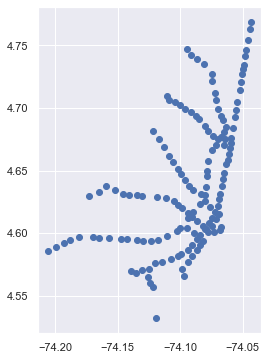

In [28]:
baseTM.geometry.plot(figsize=(12,6))

<AxesSubplot:>

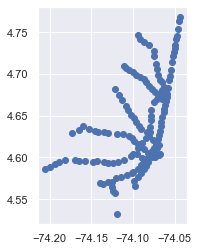

In [42]:
base1.geometry.plot()

In [29]:
TMLocalidades = pd.DataFrame(baseTM.drop(columns=['index_right','geometry']))

In [30]:
TMLocalidades.Localidad.value_counts()

Puente Aranda         14
Usaquén               13
Teusaquillo           13
Engativá              13
Santa Fe              13
Barrios Unidos        12
Suba                  11
Los Mártires          10
Kennedy               10
Chapinero             10
Rafael Uribe Uribe     8
Antonio Nariño         5
Tunjuelito             3
San Cristobal          3
Bosa                   2
Ciudad Bolivar         2
Fontibón               1
Usme                   1
La Candelaria          1
Name: Localidad, dtype: int64

In [31]:
TMLocalidades.to_csv('../Datasets Clean/TMLocalidades.csv',index=False)